In [ ]:
## Audio Classifier using Deep lerning
## dataset Url  https://urbansounddataset.weebly.com/...

In [ ]:
#DATA ANALAISE-AUDIO CLASSIFIER

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
filename='dog.wav'

In [7]:
import IPython.display as ipd
import librosa
import librosa.display 
import pkg_resources

In [8]:
!dir

 Volume in drive E is Bhuvanesh.M
 Volume Serial Number is 3086-4A3F

 Directory of E:\software & programs\naan mudhalvan\you\UrbanSound8K

04/04/2024  08:07 AM    <DIR>          .
04/02/2024  04:55 AM    <DIR>          ..
05/19/2014  11:58 AM            15,364 .DS_Store
04/04/2024  07:58 AM    <DIR>          .ipynb_checkpoints
05/19/2014  12:05 PM           705,644 100263-2-0-3.wav
04/04/2024  07:56 AM    <DIR>          2 audio
04/02/2024  05:13 AM    <DIR>          audio
04/04/2024  08:07 AM           420,425 audio classifire.ipynb
05/19/2014  12:05 PM            62,218 dog.wav
05/19/2014  12:00 PM            82,952 drilling_1.wav
05/19/2014  12:15 PM            26,155 FREESOUNDCREDITS.txt
04/02/2024  05:15 AM    <DIR>          metadata
04/03/2024  09:43 AM    <DIR>          saved_models
06/03/2014  03:10 PM             4,932 UrbanSound8K_README.txt
               7 File(s)      1,317,690 bytes
               7 Dir(s)  149,239,459,840 bytes free


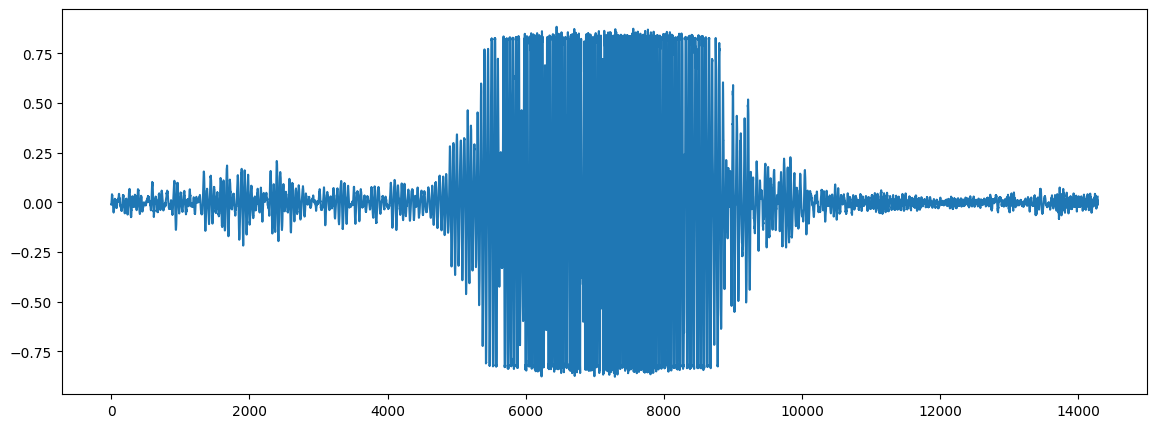

In [9]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
plt.plot(data)
ipd.Audio(filename)

In [10]:
sample_rate

22050

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(filename)

In [12]:
wave_sample_rate

48000

In [13]:
wave_audio

array([-535, -494, -371, ...,  340,  844, 1216], dtype=int16)

In [14]:
data

array([-0.01132836, -0.01227849, -0.00321344, ..., -0.0143243 ,
        0.00380835,  0.02809133], dtype=float32)

In [15]:
import pandas as pd

metadata=pd.read_csv('metadata/UrbanSound8k.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [16]:
 ### check whether the dataset is imbalanced
 metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

In [17]:
 #DATA PREPROCESSING-AUDIO CLASSIFIER

In [18]:
## Let's read a sample audio using Librosa
import librosa
audio_file_path='100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [19]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


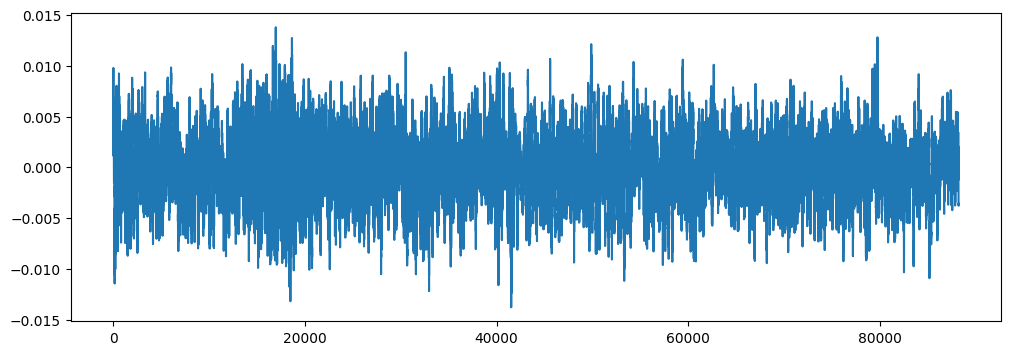

In [20]:
## Lets plot the librosa audio data
import matplotlib.pyplot as plt
#original audio with 1 channel
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)

In [21]:
# lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [22]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

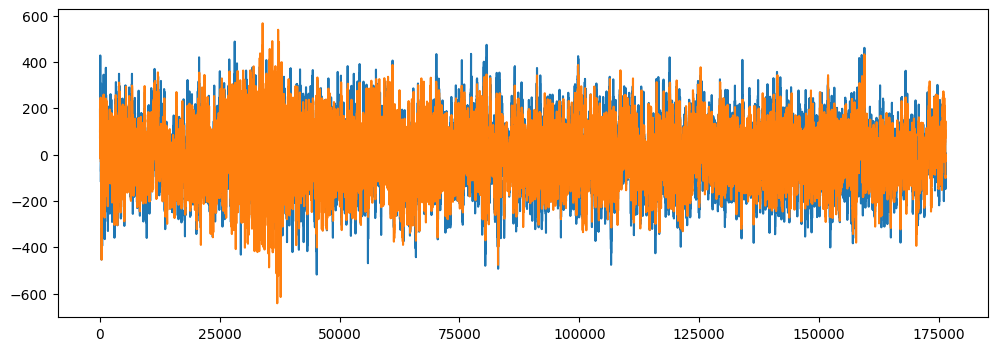

In [23]:
import matplotlib.pyplot as plt

#original audio with 2 channels
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [24]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [25]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085263e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299151e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665350e+00, -4.5019560e+00],
       ...,
       [-2.8760438e+00, -3.2479773e+00, -4.8965530e+00, ...,
        -5.2023613e-01,  3.5672503e+00,  7.4937558e+00],
       [-4.2968321e-01, -5.8838713e-01, -8.1724113e-01, ...,
         1.8340763e-01,  7.6732612e-01,  2.7120004e+00],
       [-1.1780638e+00,  6.9809544e-01,  6.3521614e+00, ...,
        -2.6221936e+00, -4.7912698e+00, -3.1826305e+00]], dtype=float32)

In [26]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='audio'
metadata=pd.read_csv('metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [27]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [29]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [10:13,  5.04it/s]C:\Users\Bhuvanesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [24:36, 12.40it/s]C:\Users\Bhuvanesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [24:36, 16.00it/s]C:\Users\Bhuvanesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [25:44,  5.65it/s]


In [30]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [31]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [32]:
X.shape

(8732, 40)

In [33]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [34]:
#lable encoding
y=np.array(pd.get_dummies(y))

In [35]:
y.shape

(8732, 10)

In [36]:
## Train test spilt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
X_train.shape

(6985, 40)

In [38]:
y_train.shape

(6985, 10)

In [39]:
X_test.shape

(1747, 40)

In [40]:
y_train.shape

(6985, 10)

In [41]:
y_test.shape

(1747, 10)

In [43]:
#MODEL CREATION
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [44]:
### No of classes
num_labels=y.shape[1]

In [45]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\Bhuvanesh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [48]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1074 - loss: 23.7574
Epoch 1: val_loss improved from inf to 2.28403, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.1075 - loss: 23.5884 - val_accuracy: 0.1156 - val_loss: 2.2840
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1177 - loss: 2.6915
Epoch 2: val_loss improved from 2.28403 to 2.25668, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1177 - loss: 2.6909 - val_accuracy: 0.1214 - val_loss: 2.2567
Epoch 3/100
215/219 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1139 - loss: 2.3557
Epoch 3: val_loss improved from 2.25668 to 2.17918, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1140 - loss: 2.3547 - val_accuracy: 0.1723 - val_loss: 2.1792
Epoch 4/100
214/219 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy

In [49]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7532913684844971


In [70]:
prediction_feature=prediction_feature.reshape(1,-1)

In [71]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [72]:
X_test[1]

array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.339348  ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339073  ,    7.673634  ,  -29.164494  ,  -18.950254  ,
         -2.9579995 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.5685973 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564746 ,    3.215267  ,   -6.984281  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346086,  -23.843391  ,
        -15.267322  ,    9.245734  ,   10.367627  ,   -0.58320117,
         -1.2624055 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [73]:
# Assuming 'model' is your trained Sequential model
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)
predicted_classes

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([5, 3, 4, ..., 1, 0, 0], dtype=int64)

In [74]:
#Testing Some Test Audio Data
#Steps

#Preprocess the new audio data
#predict the classes
#Invere transform your Predicted Label

import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded your model and scaled features (mfccs_scaled_features) as per your previous code
# Assuming labelencoder is already defined

# Fit the LabelEncoder with your labels
labels = ['dog_bark', 'children_playing', 'air_conditioner', 'street_music', 'engine_idling', 'jackhammer', 'drilling', 'siren', 'car_horn', 'gun_shot']
labelencoder = LabelEncoder()
labelencoder.fit(labels)

filename = "drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Make predictions
predicted_probabilities = model.predict(mfccs_scaled_features)

# Get the predicted class for the sample
predicted_label = np.argmax(predicted_probabilities)
prediction_class = labelencoder.inverse_transform([predicted_label])  # Use inverse_transform with a list

print("Predicted Class:", prediction_class[0])


[-95.002335   82.41885   -33.425133   53.045002  -25.890165   -1.2421542
 -33.354786    2.4007726 -22.015799   -4.352839  -12.937489   12.682033
 -21.327572   -7.491065   -2.43185    12.72689    -0.715403   24.344229
  19.957718    9.607537  -13.9335375  -1.3911704   6.956149   -1.4587445
   1.6847683   3.8889785 -17.954304   -2.0731487   5.7352476 -10.0385475
 -19.434921   -5.3122816  15.374692   20.982346    1.3509661  13.696128
   4.4257164 -17.756823  -11.576248   -3.3394582]
[[-95.002335   82.41885   -33.425133   53.045002  -25.890165   -1.2421542
  -33.354786    2.4007726 -22.015799   -4.352839  -12.937489   12.682033
  -21.327572   -7.491065   -2.43185    12.72689    -0.715403   24.344229
   19.957718    9.607537  -13.9335375  -1.3911704   6.956149   -1.4587445
    1.6847683   3.8889785 -17.954304   -2.0731487   5.7352476 -10.0385475
  -19.434921   -5.3122816  15.374692   20.982346    1.3509661  13.696128
    4.4257164 -17.756823  -11.576248   -3.3394582]]
(1, 40)
1/1 ━━━━━━━━━━

In [91]:
import numpy as np
import librosa
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded your model and scaled features (mfccs_scaled_features) as per your previous code
# Assuming labelencoder is already defined

# Fit the LabelEncoder with your labels
labels = ['dog_bark', 'children_playing', 'air_conditioner', 'street_music', 'engine_idling', 'jackhammer', 'drilling', 'siren', 'car_horn', 'gun_shot']
labelencoder = LabelEncoder()
labelencoder.fit(labels)

filename1 = "2 audio/518-4-0-0.wav"
filename2 = "2 audio/2937-1-0-0.wav"
filename3 = "2 audio/7062-6-0-0.wav"

audio, sample_rate = librosa.load(filename1, res_type='kaiser_fast') 
audio1, sample_rate1 = librosa.load(filename2, res_type='kaiser_fast')
audio2, sample_rate2 = librosa.load(filename3, res_type='kaiser_fast')
#prediction1
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)

predicted_label = np.argmax(predicted_probabilities)
prediction_class = labelencoder.inverse_transform([predicted_label])  # Use inverse_transform with a list

print("Predicted Class:", prediction_class[0])

#prediction2
mfccs_features = librosa.feature.mfcc(y=audio1, sr=sample_rate1, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)

predicted_label = np.argmax(predicted_probabilities)
prediction_class = labelencoder.inverse_transform([predicted_label])
print("Predicted Class:", prediction_class[0])

#prediction3
mfccs_features = librosa.feature.mfcc(y=audio2, sr=sample_rate2, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predicted_probabilities = model.predict(mfccs_scaled_features)

predicted_label = np.argmax(predicted_probabilities)
prediction_class = labelencoder.inverse_transform([predicted_label])
print("Predicted Class:", prediction_class[0])

[-109.16258      57.936386    -33.042652     14.372897    -31.767443
    3.1929643   -23.526052      6.8902907   -29.522179     -0.21237403
  -14.281206     12.023946    -14.65325       8.357844     -8.048549
    7.023628     -9.606827      8.186663     -6.144025      7.615827
   -5.225566      5.3874435   -10.293876      0.24498132   -9.680899
    5.2209945    -5.4389186     5.1786876    -3.596545      3.0935206
   -6.738543      3.9138331    -3.2425        4.8166914    -5.2739935
    2.2355769    -3.7051177     0.47895283   -3.9747596    -1.2134575 ]
[[-109.16258      57.936386    -33.042652     14.372897    -31.767443
     3.1929643   -23.526052      6.8902907   -29.522179     -0.21237403
   -14.281206     12.023946    -14.65325       8.357844     -8.048549
     7.023628     -9.606827      8.186663     -6.144025      7.615827
    -5.225566      5.3874435   -10.293876      0.24498132   -9.680899
     5.2209945    -5.4389186     5.1786876    -3.596545      3.0935206
    -6.738543     